# EDA

### Import Libraries

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

### Read CSV File to Create a DataFrame

In [171]:
df = pd.read_csv('../datasets/cleaned_data.csv')

### Prepare DataFrame for Analysis

In [172]:
# Check for Null Values
df.isnull().sum()

title           0
selftext     8945
subreddit       0
all_text       18
dtype: int64

In [173]:
# Remove 18 null values
df = df[df['all_text'].notna()]

In [174]:
# Create a new column for the word count of each post
df['text_word_count'] = df.all_text.apply(lambda x: len(x.split(' ')))

In [175]:
# Separate the subreddits into two dataframes
body_df = df[df['subreddit'] == 0]
power_df = df[df['subreddit'] == 1]

### Distribution of the Number of Words in Each Subreddit


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


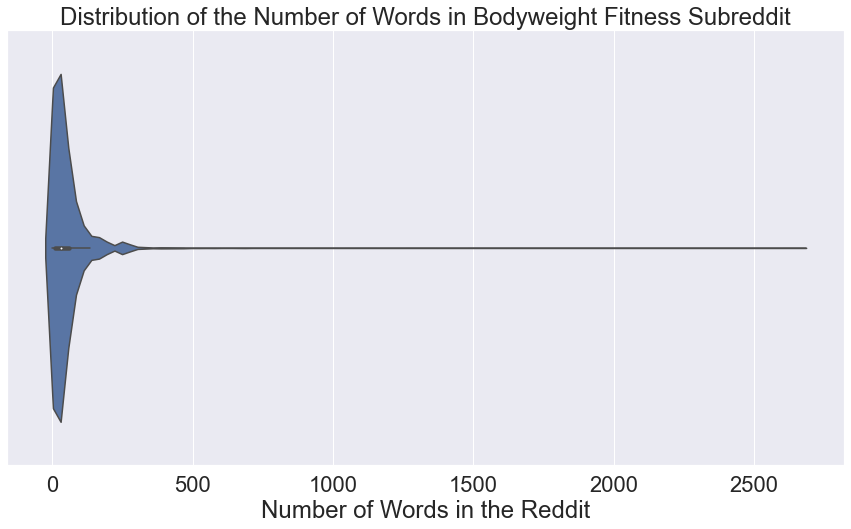

In [189]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
words = body_df['text_word_count']

ax = sns.violinplot(words)
ax.set_title('Distribution of the Number of Words in Bodyweight Fitness Subreddit')
ax.set(xlabel='Number of Words in the Reddit');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


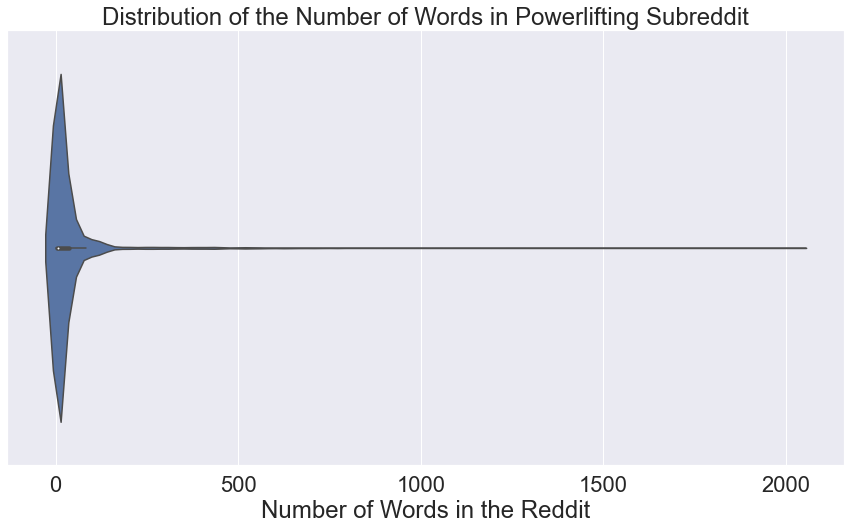

In [188]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
words = power_df['text_word_count']

ax = sns.violinplot(words)
ax.set_title('Distribution of the Number of Words in Powerlifting Subreddit')
ax.set(xlabel='Number of Words in the Reddit');

In [191]:
print(df.text_word_count.describe())

count    19982.000000
mean        43.413422
std         87.857908
min          1.000000
25%          5.000000
50%         17.000000
75%         46.000000
max       2660.000000
Name: text_word_count, dtype: float64


The violin plots for each subreddit show that a majority of posts consist of 5 to 46 words. The highest word count goes to a post with 2,660 words, which is an outlier in the data. 

### Examples of Posts

**Bodyweight Fitness Subreddit - Top 5 and Bottom 5 Posts by Word Count**

In [193]:
body_df.sort_values('text_word_count', ascending=False, inplace=True)
for status in df.selftext[:5]:
    print(status)
    print('=====================')

Currently I am only doing horizontal pushing in my push days (4x7 pushups with 10 kg). Should I add vertical pushing as well? If yes, why, and in which direction (vertical up (pike pushups) or vertical down (dips))? And exactly how should I implement them in my routine?
So as the title says i think the pelican curl is a cool skill and i want to learn this.

My plan is by starting with reduced ROM  
I have a pair of paralettes, that i get about 50% Rom of a pelican curl with them, and i feel that this is achievable and a good starting place.

I have a pullup bar and rings that i can adjust for about 75-80% ROM.

In addition to this i can set to the rings high on the tree or a bar, or use something else and eventually get 100% of the ROM.

  
Before i can do any of these, i need one thing.

That is mobility.

I think that while pelican curls are supposed to be directly behind me, I could potentially also make them wider right, not wide but sort of diagonolly behind me, or is that making 

<ipython-input-193-b8694fbea3a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_df.sort_values('text_word_count', ascending=False, inplace=True)


In [111]:
body_df.sort_values('text_word_count', ascending=True, inplace=True)
for status in df.title[:5]:
    print(status)
    print('=====================')

Vertical Pushing in Which Direction?
Pelican Curls and Shoulder mobility
Use fat mobilizer to shed your extra kilos
Can't bring get legs low enough for planche
Just started the RR 6 Days ago and I went from being able to do 3 pulls up to almost 5!


<ipython-input-111-d2a270ea98a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_df.sort_values('text_word_count', ascending=True, inplace=True)


**Powerlifting Subreddit - Top 5 and Bottom 5 Posts by Word Count**

In [112]:
power_df.sort_values('text_word_count', ascending=False, inplace=True)
for status in df.selftext[:5]:
    print(status)
    print('=====================')

Currently I am only doing horizontal pushing in my push days (4x7 pushups with 10 kg). Should I add vertical pushing as well? If yes, why, and in which direction (vertical up (pike pushups) or vertical down (dips))? And exactly how should I implement them in my routine?
So as the title says i think the pelican curl is a cool skill and i want to learn this.

My plan is by starting with reduced ROM  
I have a pair of paralettes, that i get about 50% Rom of a pelican curl with them, and i feel that this is achievable and a good starting place.

I have a pullup bar and rings that i can adjust for about 75-80% ROM.

In addition to this i can set to the rings high on the tree or a bar, or use something else and eventually get 100% of the ROM.

  
Before i can do any of these, i need one thing.

That is mobility.

I think that while pelican curls are supposed to be directly behind me, I could potentially also make them wider right, not wide but sort of diagonolly behind me, or is that making 

<ipython-input-112-66dbc882403d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_df.sort_values('text_word_count', ascending=False, inplace=True)


In [113]:
power_df.sort_values('text_word_count', ascending=True, inplace=True)
for status in df.title[:5]:
    print(status)
    print('=====================')

Vertical Pushing in Which Direction?
Pelican Curls and Shoulder mobility
Use fat mobilizer to shed your extra kilos
Can't bring get legs low enough for planche
Just started the RR 6 Days ago and I went from being able to do 3 pulls up to almost 5!


<ipython-input-113-41bccfdd7f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_df.sort_values('text_word_count', ascending=True, inplace=True)


### Most Common Words by Subreddit

**Bodyweight Fitness**

In [194]:
# Tokenize the dataframe and isolate the target variable
cvec_body = CountVectorizer(min_df=3, stop_words='english')
cvec_body.fit(body_df['all_text'])

# Created a new dataframe for the words in the bodyweight fitness subreddit
body_words = pd.DataFrame(cvec_body.transform(body_df['all_text']).todense(),
                       columns=cvec_body.get_feature_names())

CountVectorizer(min_df=3, stop_words='english')

In [145]:
body_words.sum().sort_values(ascending=False)[0:16]

http       4967
weight     4911
pull       4766
day        4367
exerci     4298
workout    4129
com        4107
like       4042
train      3944
amp        3653
work       3499
fit        3460
start      3421
www        3409
routin     3371
muscl      3225
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

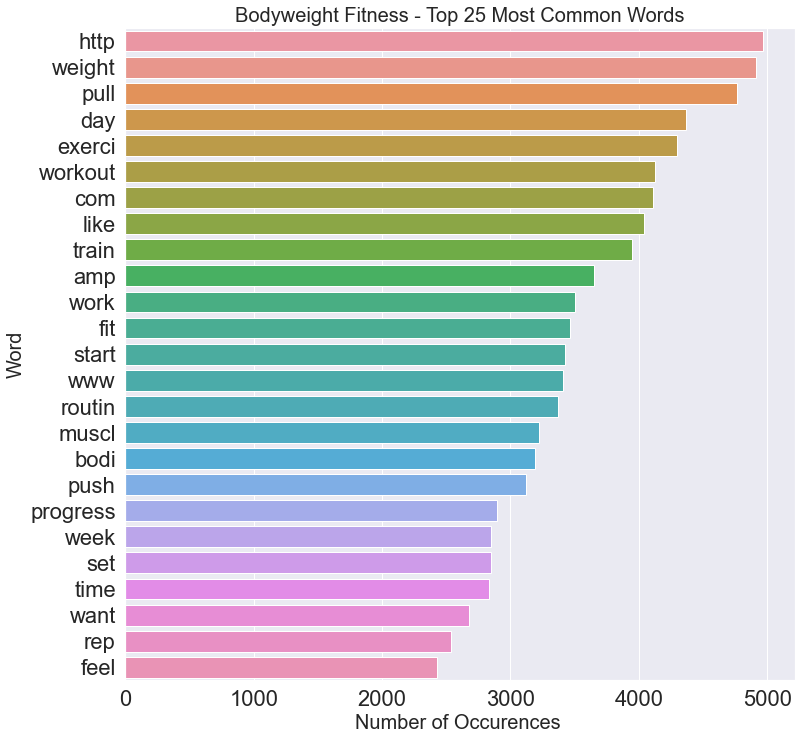

In [202]:
# Bargraph for Bodyweight Fitness
sns.set(font_scale=2)

x_values = body_words.sum().sort_values(ascending=False)[0:25].index
y_values = body_words.sum().sort_values(ascending=False)[0:25].values

plt.figure(figsize=(12, 12))
ax = plt.subplot()
sns.barplot( y_values, x_values )

plt.title('Bodyweight Fitness - Top 25 Most Common Words', fontsize=20)
plt.xlabel('Number of Occurences ', fontsize=20)
plt.ylabel('Word', fontsize=20)

;

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Word')

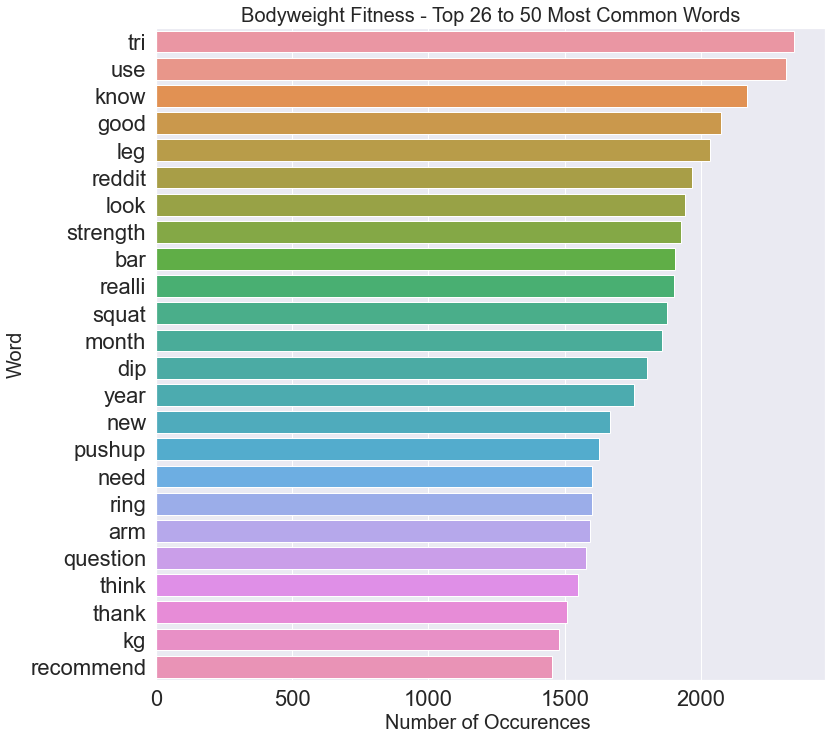

In [206]:
sns.set(font_scale=2)

x_values = body_words.sum().sort_values(ascending=False)[26:50].index
y_values = body_words.sum().sort_values(ascending=False)[26:50].values

plt.figure(figsize=(12, 12))
ax = plt.subplot()
sns.barplot( y_values, x_values )

plt.title('Bodyweight Fitness - Top 26 to 50 Most Common Words', fontsize=20)
plt.xlabel('Number of Occurences ', fontsize=20)
plt.ylabel('Word', fontsize=20)

**Powerlifting**

In [196]:
cvec_power = CountVectorizer(min_df=3, stop_words='english')
cvec_power.fit(power_df['all_text'])

power_words = pd.DataFrame(cvec_power.transform(power_df['all_text']).todense(),
                       columns=cvec_power.get_feature_names())

In [146]:
power_words.sum().sort_values(ascending=False)[0:16]

kg           7045
lb           4151
meet         3672
squat        3440
bench        3373
deadlift     3073
lift         2996
powerlift    2683
thread       2392
post         2321
use          2306
train        2197
day          2126
week         2086
pr           2045
open         2030
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Word')

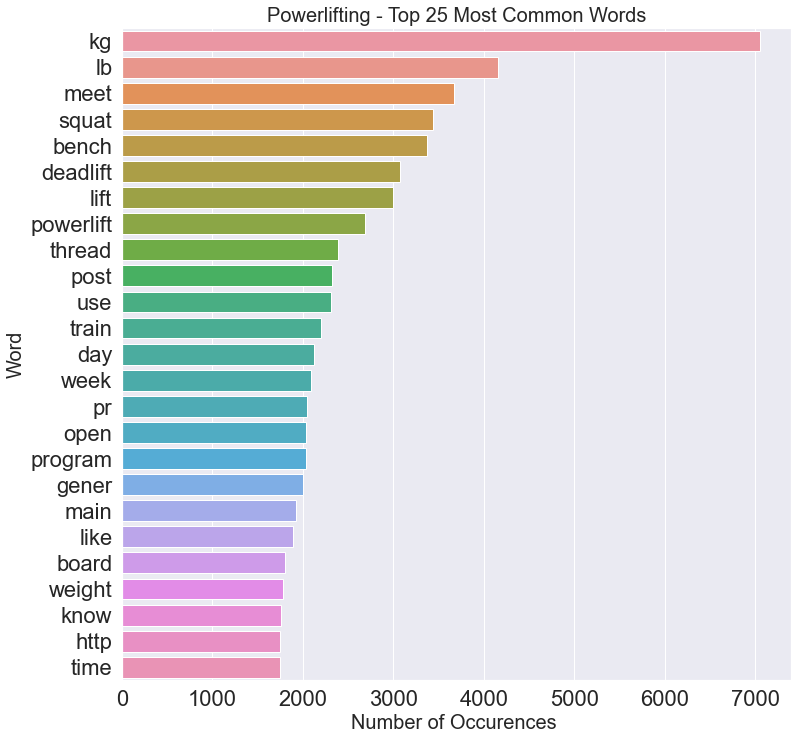

In [203]:
sns.set(font_scale=2)

x_values = power_words.sum().sort_values(ascending=False)[0:25].index
y_values = power_words.sum().sort_values(ascending=False)[0:25].values

plt.figure(figsize=(12, 12))
ax = plt.subplot()
sns.barplot( y_values, x_values )

plt.title('Powerlifting - Top 25 Most Common Words', fontsize=20)
plt.xlabel('Number of Occurences ', fontsize=20)
plt.ylabel('Word', fontsize=20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Word')

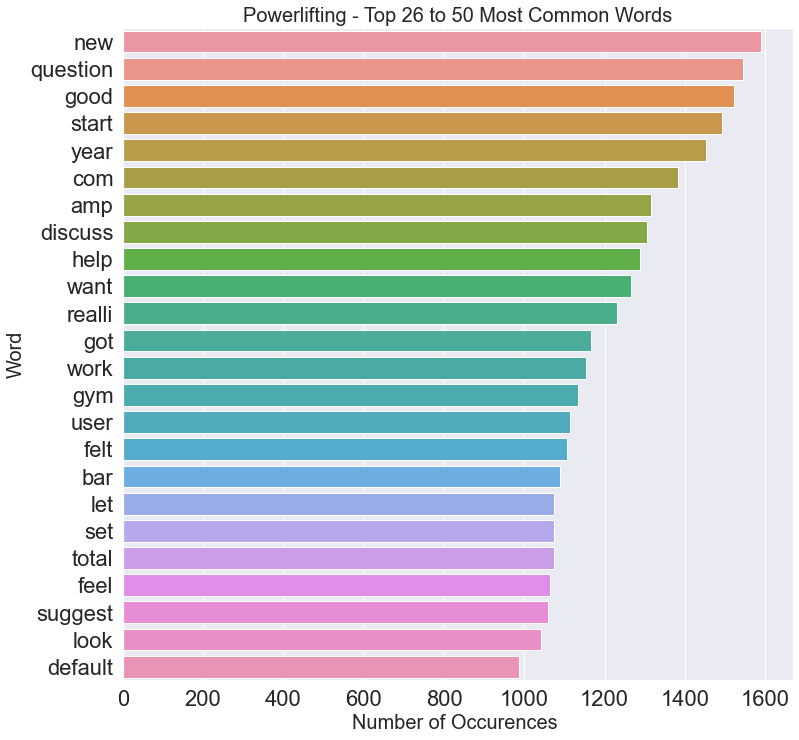

In [204]:
sns.set(font_scale=2)

x_values = power_words.sum().sort_values(ascending=False)[26:50].index
y_values = power_words.sum().sort_values(ascending=False)[26:50].values

plt.figure(figsize=(12, 12))
ax = plt.subplot()
sns.barplot( y_values, x_values )

plt.title('Powerlifting - Top 26 to 50 Most Common Words', fontsize=20)
plt.xlabel('Number of Occurences ', fontsize=20)
plt.ylabel('Word', fontsize=20)

**Analysis of Word Occurences:**
<br>
**The bodyweight fitness reddit reveals several themes:**
- Website usage. Three of the top 15 words are "http", "www", and "com". Through further investigation I determined that these are websites and links that are references to workout videos, exercise guides, and progress photos. This suggests that this community is open to researching and collecting pieces for their fitness program. 
- Time oriented - Words that reference time include "routine", "progress", and "day". 
- Fitness Terms - "Weight" is the second ranked word; however, this is not referencing kilograms or pounds like the powerlifting reddit. The top 50 words focus on bodyweight exercises such as "pushup", "pull", "dip" and "squat. Additionally, terms like "fit" and "exercise" point to a more rounded program rather than specific muscle groups. <br><br>**The powerlifting reddit points to a different type of workout program:**
- Weights - The top words are "kg" and "lb". The reddit is dominated by discussion and programming focused around the amount of weight for exercises. 
- Exercises - Complimenting the focus on kilograms and pounds are the other most frequent words that highlight the powerlifters most important exercises. These include "squat", "bench", "deadlift", and "powerlift". Other frequent words put the exercises in context. The focus is on the "lift", "bar" (barbell) and "pr" (person record). Additionally words like "gym" and "program" are found in this subreddit.
